In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import h5py
import numpy as np
import lmfit
import os
import pandas as pd

In [2]:
models = [
    lmfit.models.VoigtModel(prefix = 'v1_')+lmfit.models.VoigtModel(prefix = 'v2_')+lmfit.models.VoigtModel(prefix = 'v3_')+lmfit.models.VoigtModel(prefix = 'v4_')+lmfit.models.VoigtModel(prefix = 'v5_'),
    lmfit.models.LorentzianModel(prefix = 'v1_')+lmfit.models.LorentzianModel(prefix = 'v2_')+lmfit.models.LorentzianModel(prefix = 'v3_')+lmfit.models.LorentzianModel(prefix = 'v4_'),
    lmfit.models.Pearson7Model(prefix = 'v1_')+lmfit.models.Pearson7Model(prefix = 'v2_')+lmfit.models.Pearson7Model(prefix = 'v3_')+lmfit.models.Pearson7Model(prefix = 'v4_')
]

In [3]:
folders = ['4a', '4b', '4bh2o', '6a', '6b', '12h2o', '13', '14', '16', ]
# folders = ['13']
base = r'C:\Users\FO\Git\euxfel_fit\scratch'

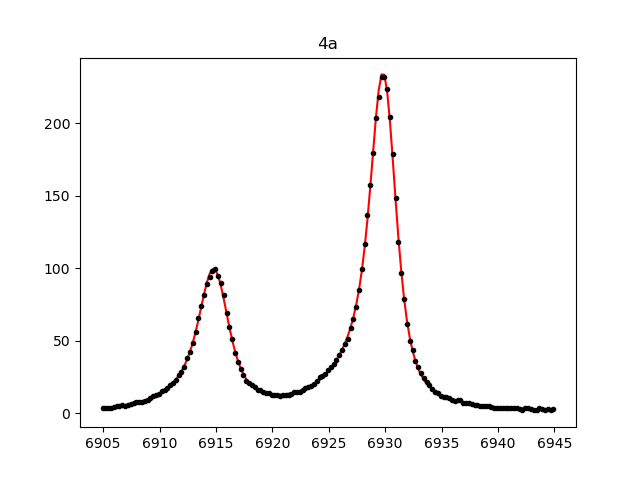

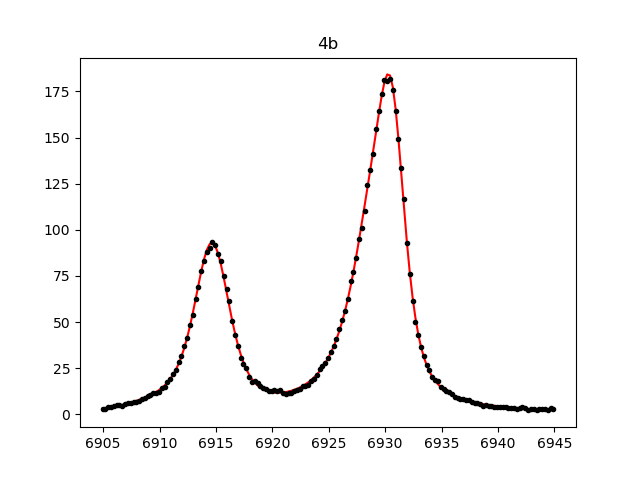

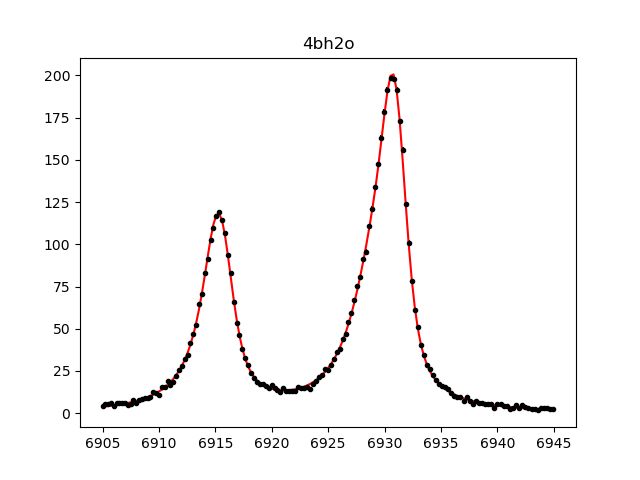

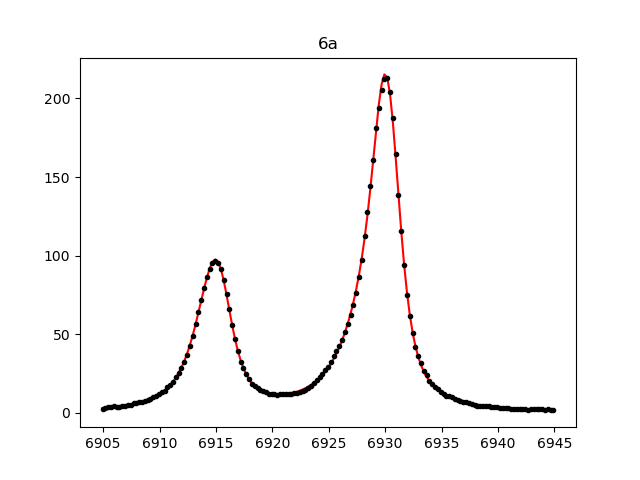

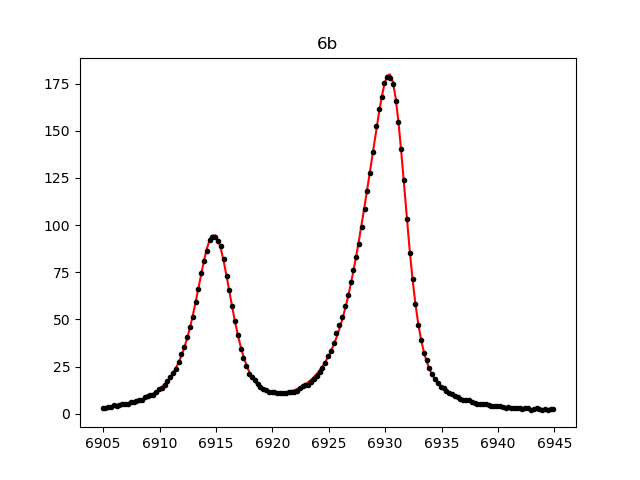

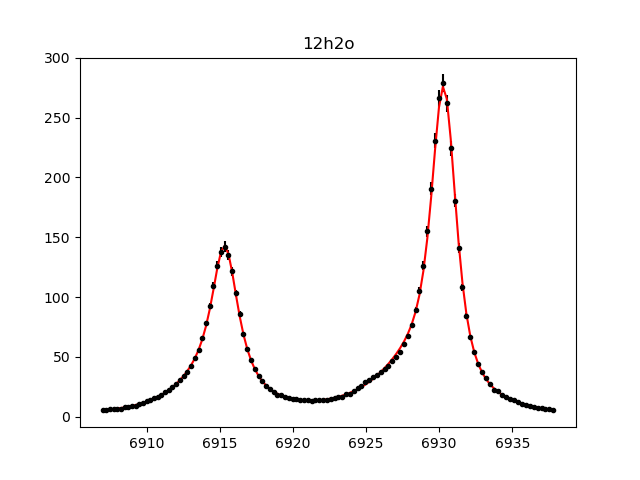

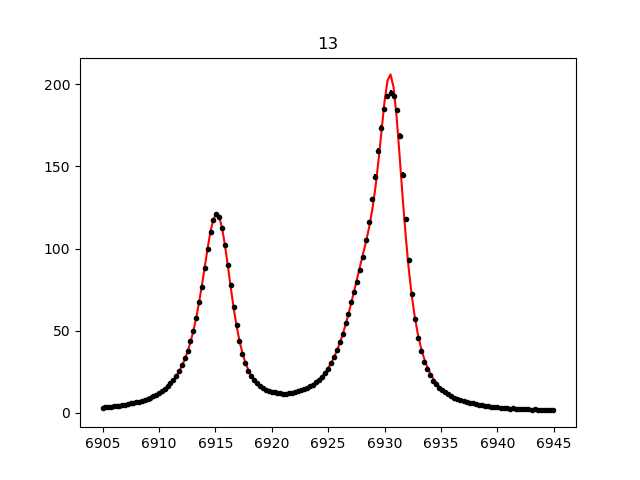

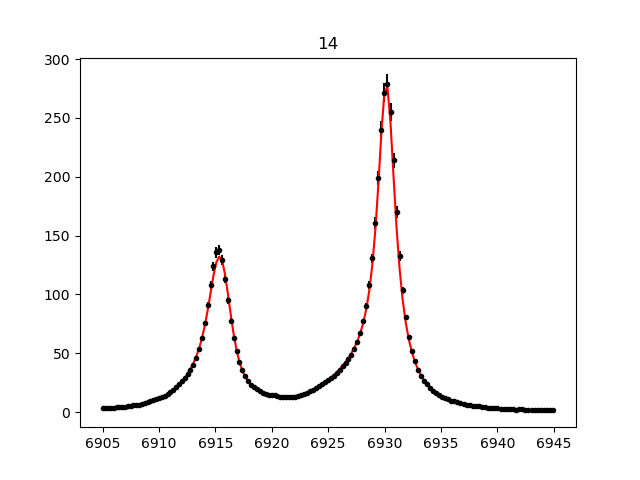

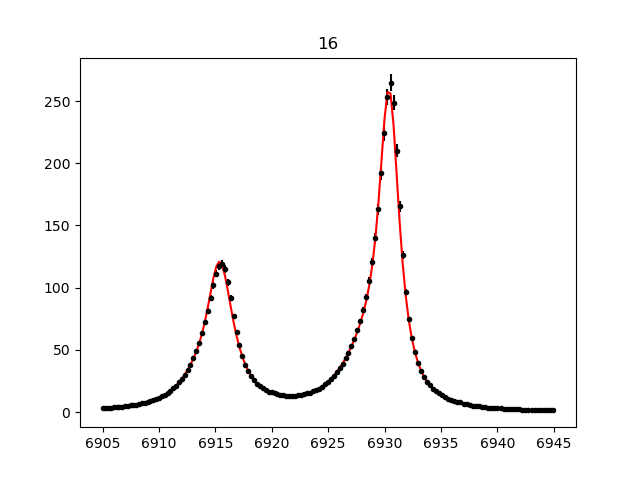

In [4]:
table = dict(Compound = [], Splitting = [], Splitting_iwae = [], Ratio = [], Ratio_Area = [], FWHM_ka1 = [], FWHM_ka2 = [])

for folder in folders:
    params = lmfit.parameter.Parameters()
    with h5py.File(os.path.join(base, folder, '04_compare.h5'), 'r') as h5_file:

        for name, value in zip(h5_file['params/names'], h5_file['params/best_sorted'][0,0]):
            params.add(name.decode('utf8'), value = value)
            
        x, y, yerr = h5_file['fit_data/x'][()],  h5_file['fit_data/y'][()],  h5_file['fit_data/errors'][()]
        model_id = h5_file['params/model_id'][()]
        
        compound = '\\gls{{{}}}'.format(folder)
        table['Compound'].append(compound)
        table['Splitting'].append(h5_file['description/position(3,4)_sorted'][0,0]-h5_file['description/position(1,2)_sorted'][0,0])
        table['Splitting_iwae'].append(h5_file['description/iwae(3,4)_sorted'][0,0]-h5_file['description/iwae(1,2)_sorted'][0,0])
        table['Ratio'].append(h5_file['description/height(3,4)_sorted'][0,0]/h5_file['description/height(1,2)_sorted'][0,0])
        table['Ratio_Area'].append(h5_file['description/area(3,4)_sorted'][0,0]/h5_file['description/area(1,2)_sorted'][0,0])
        table['FWHM_ka1'].append(h5_file['description/fwhm(3,4)_sorted'][0,0])
        table['FWHM_ka2'].append(h5_file['description/fwhm(1,2)_sorted'][0,0])

    #display(params)
    fig, ax = plt.subplots()
    ax.errorbar(x, y[0], yerr = yerr[0]/2, color = 'k', ls = 'none', marker = '.')
    ax.set_title(folder)
    
    model = models[model_id]
    
    ax.plot(x, model.eval(x = x, params = params), 'r')
    


In [5]:
t = pd.DataFrame(table)
cfmt = ['l'] + ['S[round-mode=places]' for i in range(len(t.columns))]
print(t.to_latex(index = False, column_format = '\n'.join(cfmt), header = [r'{{{}}}'.format(k) for k in t.columns], escape = False))

\begin{tabular}{l
S[round-mode=places]
S[round-mode=places]
S[round-mode=places]
S[round-mode=places]
S[round-mode=places]
S[round-mode=places]
S[round-mode=places]}
\toprule
 {Compound} & {Splitting} & {Splitting_iwae} &  {Ratio} & {Ratio_Area} & {FWHM_ka1} & {FWHM_ka2} \\
\midrule
   \gls{4a} &   15.019591 &        14.788304 & 2.429287 &     2.416778 &   2.975085 &   3.375672 \\
   \gls{4b} &   15.646119 &        15.087769 & 2.047669 &     2.516601 &   4.313630 &   3.834880 \\
\gls{4bh2o} &   15.432876 &        14.978090 & 1.721189 &     1.766772 &   3.693210 &   3.263312 \\
   \gls{6a} &   15.058672 &        14.872281 & 2.246499 &     2.090574 &   3.380557 &   3.654128 \\
   \gls{6b} &   15.539256 &        15.304274 & 1.940782 &     2.198392 &   4.479726 &   3.883732 \\
\gls{12h2o} &   14.971330 &        14.718270 & 1.945643 &     1.648729 &   2.276502 &   2.574499 \\
   \gls{13} &   15.367726 &        14.824108 & 1.722292 &     1.841398 &   3.585735 &   3.268197 \\
   \gls{14} &   

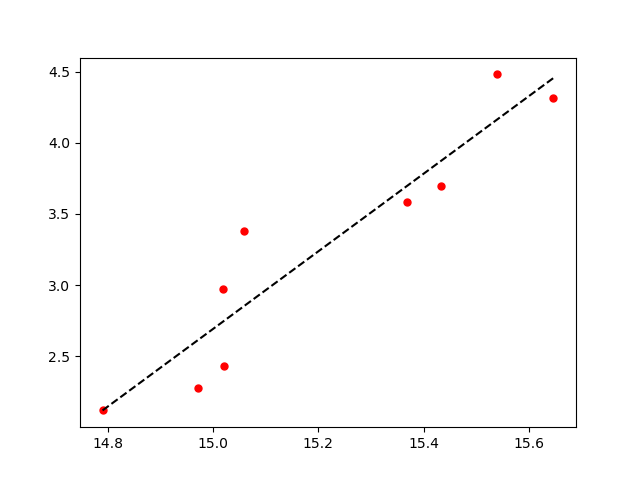

In [25]:
x, y = t['Splitting'].to_numpy(), t['FWHM_ka1'].to_numpy()
fig, ax = plt.subplots()
ax.plot(x, y, 'r.', ms = 10)

model = lmfit.models.LinearModel()
result = model.fit(x = x, data = y)
x = np.sort(x)
ax.plot(x, model.eval(x = x, params = result.params), 'k--')


In [8]:
cfmt = ['l'] + ['S[table-format=2.1, round-precision=1, round-mode=places]' for i in range(len(t.columns))]
header = [r'{{{}}}'.format(k) for k in t.columns[1:]]
corr = t.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = ""
print(corr.to_latex(column_format = '\n'.join(cfmt),  header = header, escape = False))

\begin{tabular}{l
S[table-format=2.1, round-precision=1, round-mode=places]
S[table-format=2.1, round-precision=1, round-mode=places]
S[table-format=2.1, round-precision=1, round-mode=places]
S[table-format=2.1, round-precision=1, round-mode=places]
S[table-format=2.1, round-precision=1, round-mode=places]
S[table-format=2.1, round-precision=1, round-mode=places]
S[table-format=2.1, round-precision=1, round-mode=places]}
\toprule
{} & {Splitting} & {Splitting_iwae} &   {Ratio} & {Ratio_Area} & {FWHM_ka1} & {FWHM_ka2} \\
\midrule
Splitting      &             &                  &           &              &            &            \\
Splitting_iwae &    0.830165 &                  &           &              &            &            \\
Ratio          &   -0.528478 &        -0.311421 &           &              &            &            \\
Ratio_Area     &    0.466677 &         0.576004 &   0.43262 &              &            &            \\
FWHM_ka1       &    0.938089 &         0.919693 &